## Import Necessary Libraries

In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

## 1. Data Feteching from Yahoo Finance

In [4]:
#pip install yfinance

In [6]:
# Get the data for HDFCBANK
ticker = "HDFCBANK.NS"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [7]:
data.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-04-01  1499.400024  1499.400024  1465.000000  1486.750000  1427.248291   
2021-04-05  1480.000000  1485.000000  1431.000000  1449.599976  1391.584961   
2021-04-06  1460.000000  1462.650024  1432.650024  1440.250000  1382.609131   
2021-04-07  1439.300049  1456.699951  1421.550049  1447.199951  1389.280884   
2021-04-08  1453.000000  1460.900024  1430.500000  1432.800049  1375.457397   

              Volume  
Date                  
2021-04-01  17881881  
2021-04-05   8003293  
2021-04-06   7537867  
2021-04-07  12544090  
2021-04-08   8806796

In [8]:
## 2. Select the Target Variable and Clean the data

In [9]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


### 2.1 Plot the time series

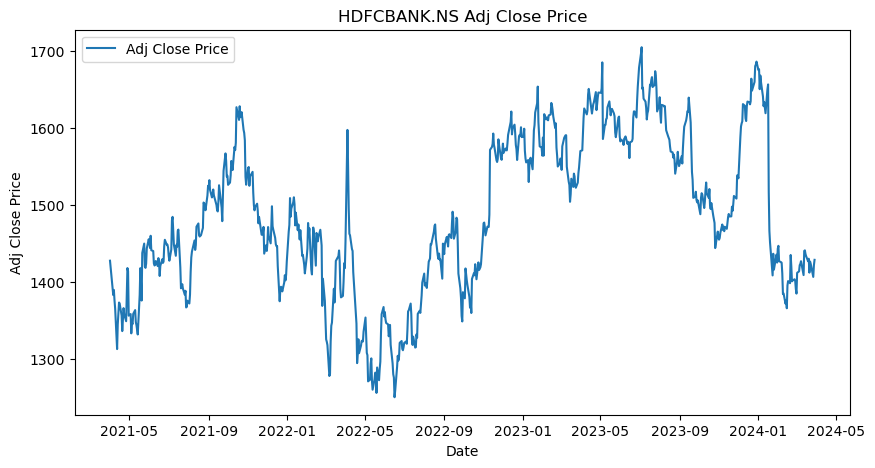

In [10]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('HDFCBANK.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [11]:
import plotly.graph_objs as go
import plotly.express as px

# Assuming df is your Dataframe with a datetime index and 'Adj Close Price' as the column
fig = px.line(df, y='Adj Close', title='HDFCBANK.NS Adj Close Price')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Adj Close',
    legend_title_text='',
    width=1000,
    height=500
)

fig.show()

### 2.2 Decomposition of Time series

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df.columns

Index(['Adj Close'], dtype='object')

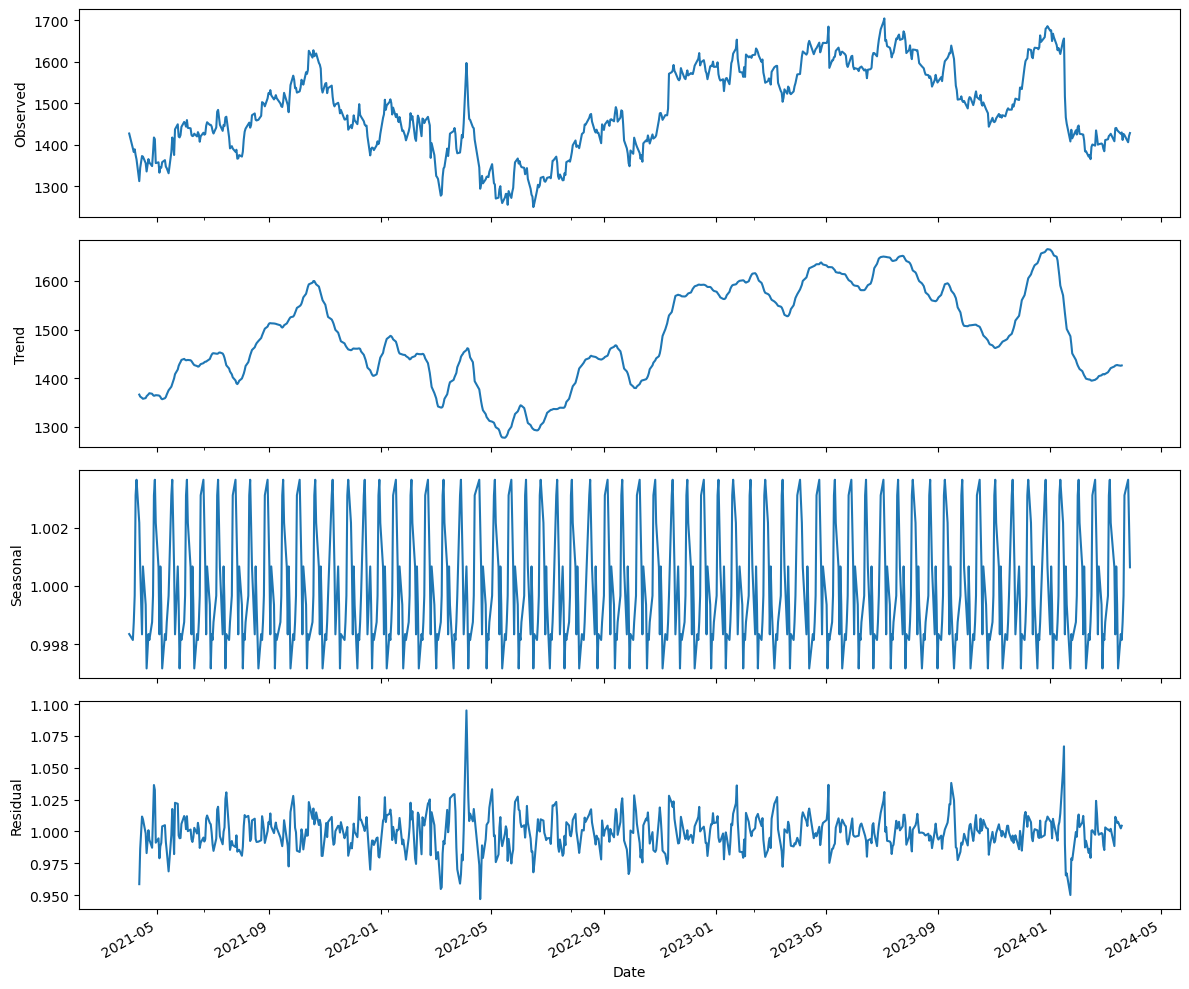

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [15]:
# Split the data into training and test sets
#train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

## 3. Univariate Forecasting - Conventional Models/Statistical Models

### 3.1 HW Model

In [16]:
monthly_data = df.resample("M").mean()

In [17]:
monthly_data.head()

Adj Close
Date                   
2021-04-30  1371.761410
2021-05-31  1387.358661
2021-06-30  1434.235673
2021-07-31  1424.722836
2021-08-31  1460.019339

In [18]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [19]:
len(monthly_data), len(train_data)

(36, 28)

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

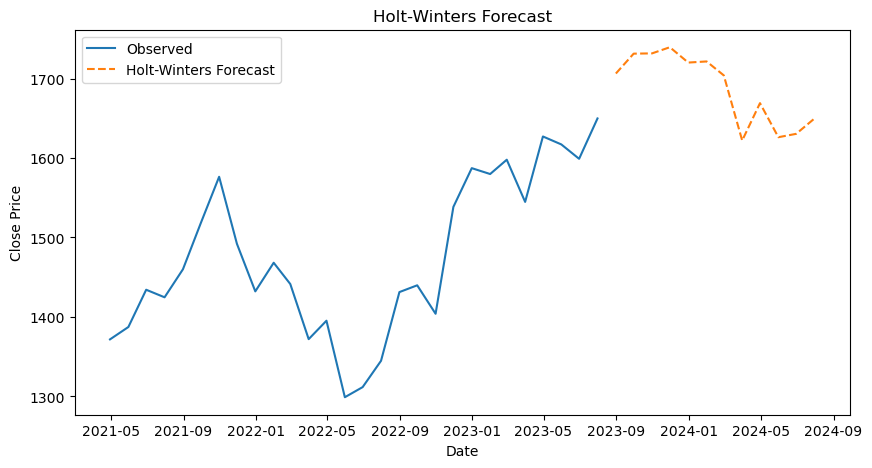

In [21]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [22]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [23]:
len(test_data), len(y_pred)

(8, 8)

In [24]:
y_pred, test_data

(2023-08-31    1706.390263
 2023-09-30    1731.391461
 2023-10-31    1731.736022
 2023-11-30    1739.483559
 2023-12-31    1720.176267
 2024-01-31    1721.578590
 2024-02-29    1704.024235
 2024-03-31    1622.031853
 Freq: M, dtype: float64,
               Adj Close
 Date                   
 2023-08-31  1587.990284
 2023-09-30  1563.766089
 2023-10-31  1494.526593
 2023-11-30  1486.096698
 2023-12-31  1630.068201
 2024-01-31  1561.023990
 2024-02-29  1402.113066
 2024-03-31  1423.774400)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 202.1582454555789
MAE: 190.9316161273921
MAPE: nan
R-squared: -6.220965966554176


In [26]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [27]:
holt_winters_forecast

2023-08-31    1706.390263
2023-09-30    1731.391461
2023-10-31    1731.736022
2023-11-30    1739.483559
2023-12-31    1720.176267
2024-01-31    1721.578590
2024-02-29    1704.024235
2024-03-31    1622.031853
2024-04-30    1669.100690
2024-05-31    1626.215131
2024-06-30    1630.460827
2024-07-31    1649.835026
2024-08-31    1706.390263
2024-09-30    1731.391461
2024-10-31    1731.736022
2024-11-30    1739.483559
2024-12-31    1720.176267
2025-01-31    1721.578590
2025-02-28    1704.024235
2025-03-31    1622.031853
Freq: M, dtype: float64

### 3.2 ARIMA Montly Data

In [28]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [31]:
!pip install blosc2~=2.0.0
!pip install pmdarima

In [32]:
from pmdarima import auto_arima

In [33]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -146.471
Date:                Mon, 22 Jul 2024   AIC                            294.942
Time:                        23:07:58   BIC                            296.238
Sample:                    04-30-2021   HQIC                           295.327
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3017.5643    897.887      3.361      0.001    1257.739    4777.390
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.72   Pr

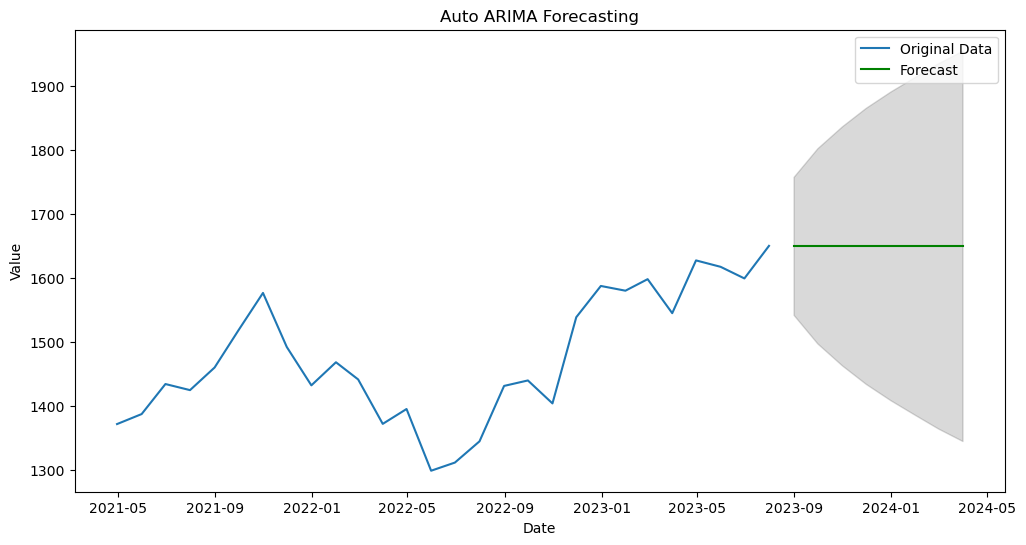

In [34]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [35]:
len(forecast)

8

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 151.20819480061095
MAE: 131.16513878408097
MAPE: nan
R-squared: -3.0398294980017004


### 3.3 ARIMA Daily Data

In [37]:
daily_data= df.copy()

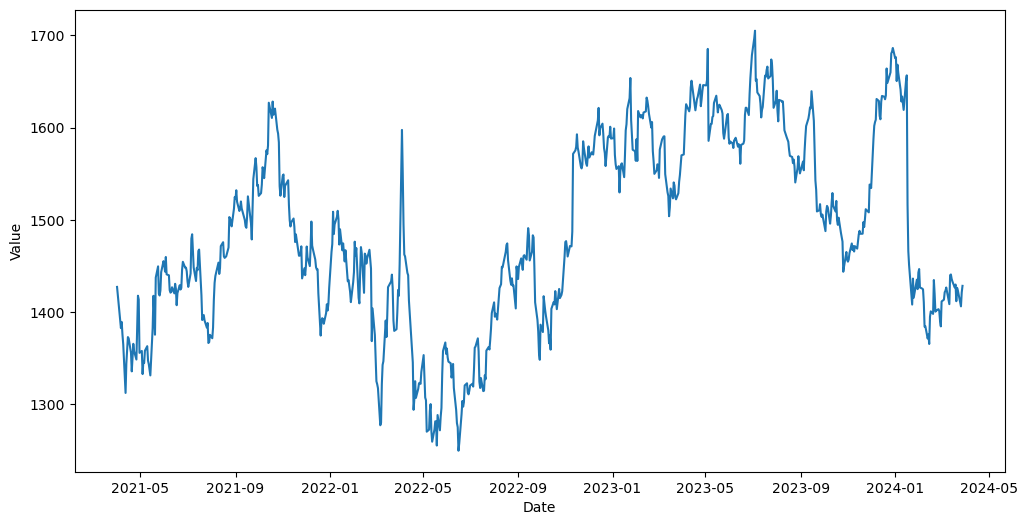

In [38]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [39]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

In [40]:
# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  740
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -3259.259
Date:                Mon, 22 Jul 2024   AIC                           6530.519
Time:                        23:08:42   BIC                           6558.150
Sample:                             0   HQIC                          6541.173
                                - 740                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3772      0.029    -12.905      0.000      -0.434      -0.320
ar.L2         -0.9635      0.015    -65.139      0.000      -0.992      -0.934
ar.L3          0.0709      0.028      2.516      0.0

In [41]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [42]:
fitted_values

Date
2021-04-01       0.000000
2021-04-05    1427.276808
2021-04-06    1389.822922
2021-04-07    1383.489031
2021-04-08    1388.542828
                 ...     
2024-03-21    1415.241500
2024-03-22    1429.154193
2024-03-26    1417.546726
2024-03-27    1405.902445
2024-03-28    1427.569342
Name: predicted_mean, Length: 740, dtype: float64

In [43]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

D:\CHRIST\PYTHON\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\CHRIST\PYTHON\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [44]:
len(forecast)

60

In [45]:
len(future_dates)

NameError: name 'future_dates' is not defined

In [48]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

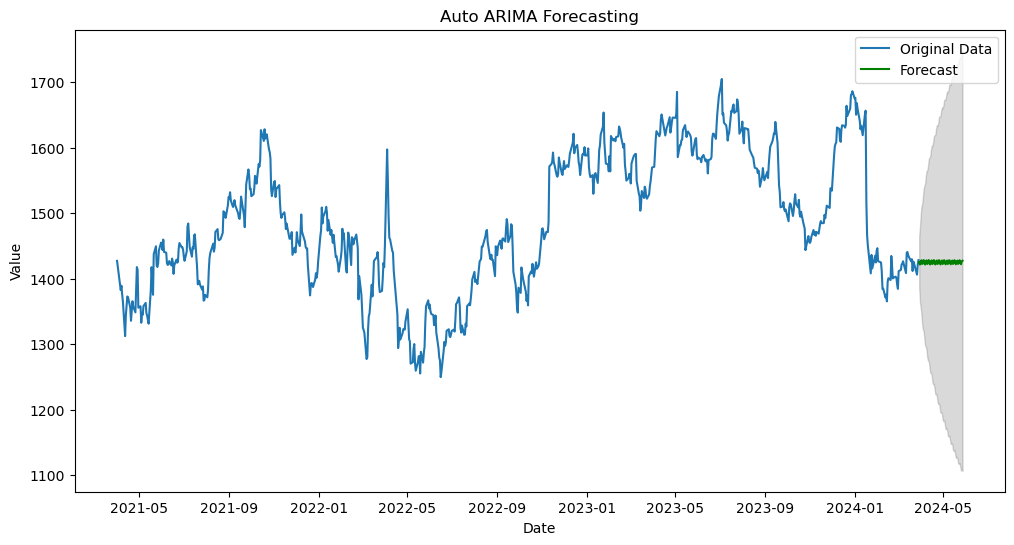

In [49]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

### 2. Multivariate Forecasting - Machine Learning Models

In [50]:
 !pip install tensorflow

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [52]:
data.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-04-01  1499.400024  1499.400024  1465.000000  1486.750000  1427.248291   
2021-04-05  1480.000000  1485.000000  1431.000000  1449.599976  1391.584961   
2021-04-06  1460.000000  1462.650024  1432.650024  1440.250000  1382.609131   
2021-04-07  1439.300049  1456.699951  1421.550049  1447.199951  1389.280884   
2021-04-08  1453.000000  1460.900024  1430.500000  1432.800049  1375.457397   

              Volume  
Date                  
2021-04-01  17881881  
2021-04-05   8003293  
2021-04-06   7537867  
2021-04-07  12544090  
2021-04-08   8806796

In [53]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [54]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (710, 30, 6)
Shape of y: (710,)


In [55]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

D:\CHRIST\PYTHON\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0648 - val_loss: 0.0154
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0258 - val_loss: 0.0110
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0243 - val_loss: 0.0112
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0146 - val_loss: 0.0097
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0131 - val_loss: 0.0094
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0146 - val_loss: 0.0091
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0148 - val_loss: 0.0089
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0126 - val_loss: 0.0087
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0113 - val_loss: 0.0085
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0127 - val_loss: 0.0079
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0125 - val_loss: 0.0076
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0

In [58]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


In [59]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 1557.1068279254832, True Value: 1557.4324951171875
Prediction: 1557.772691356753, True Value: 1550.2801513671875
Prediction: 1556.071010218293, True Value: 1553.4864501953125
Prediction: 1554.1717759384337, True Value: 1563.203857421875
Prediction: 1555.15807647998, True Value: 1553.683837890625
Prediction: 1555.6385422165404, True Value: 1574.0062255859375
Prediction: 1558.06130181755, True Value: 1589.1494140625
Prediction: 1563.5076745172046, True Value: 1601.5303955078125
Prediction: 1571.9104797663895, True Value: 1609.8172607421875
Prediction: 1581.810819768114, True Value: 1614.8485107421875


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 35.62022531125813
MAE: 24.270046190543773
MAPE: 1.5872152306458873
R-squared: 0.8400233698447482


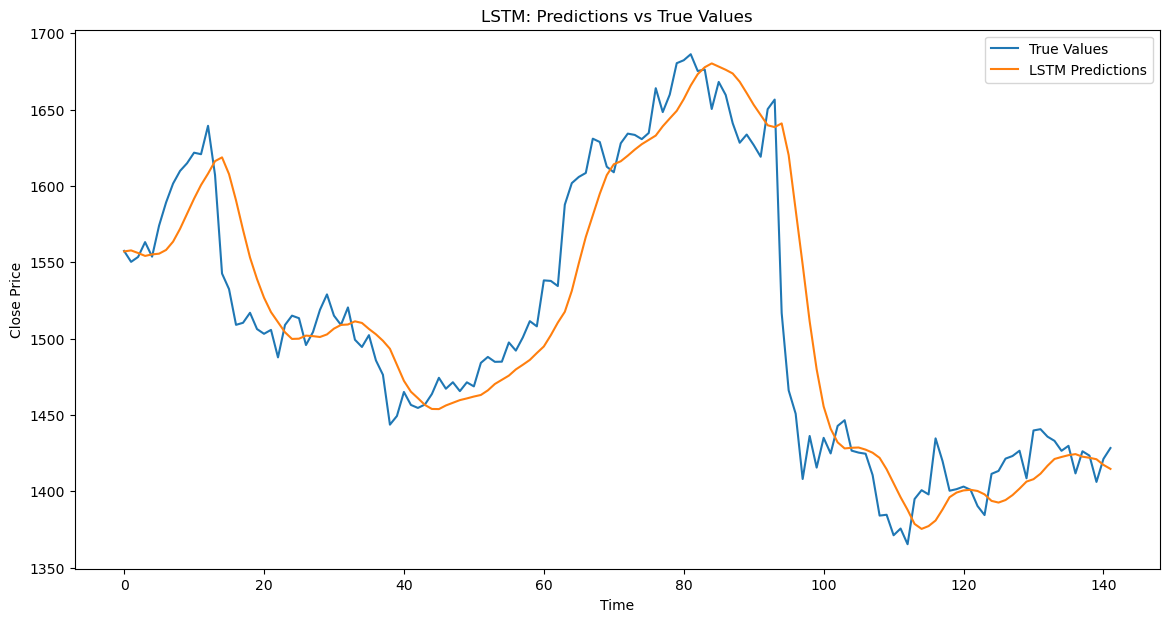

In [61]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


### Tree Based Models

In [62]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [63]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [64]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [65]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.0035806542382392664


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.059838568149975534
MAE: 0.04567951741443901
MAPE: 534889.7363207806
R-squared: 0.91843115194108


In [67]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.0019725053651325443


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.044412896383061354
MAE: 0.031993516246740766
MAPE: 391287.1117373367
R-squared: 0.9550654769439513


In [69]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.14301964903492514, True Value: 0.17023085262915405
Prediction: 0.24329427374889656, True Value: 0.2576497906056945
Prediction: 0.4252362976587576, True Value: 0.3885276001725888
Prediction: 0.3695623783717683, True Value: 0.38513561891389525
Prediction: 0.012319899042366522, True Value: 0.06984923127337517
Prediction: 0.6467338269480827, True Value: 0.5516360698283145
Prediction: 0.7998599657986172, True Value: 0.7564080664205117
Prediction: 0.6467338269480827, True Value: 0.6056444348740402
Prediction: 0.2637563758869792, True Value: 0.35815744810595795
Prediction: 0.3370568522231565, True Value: 0.33337257437406276


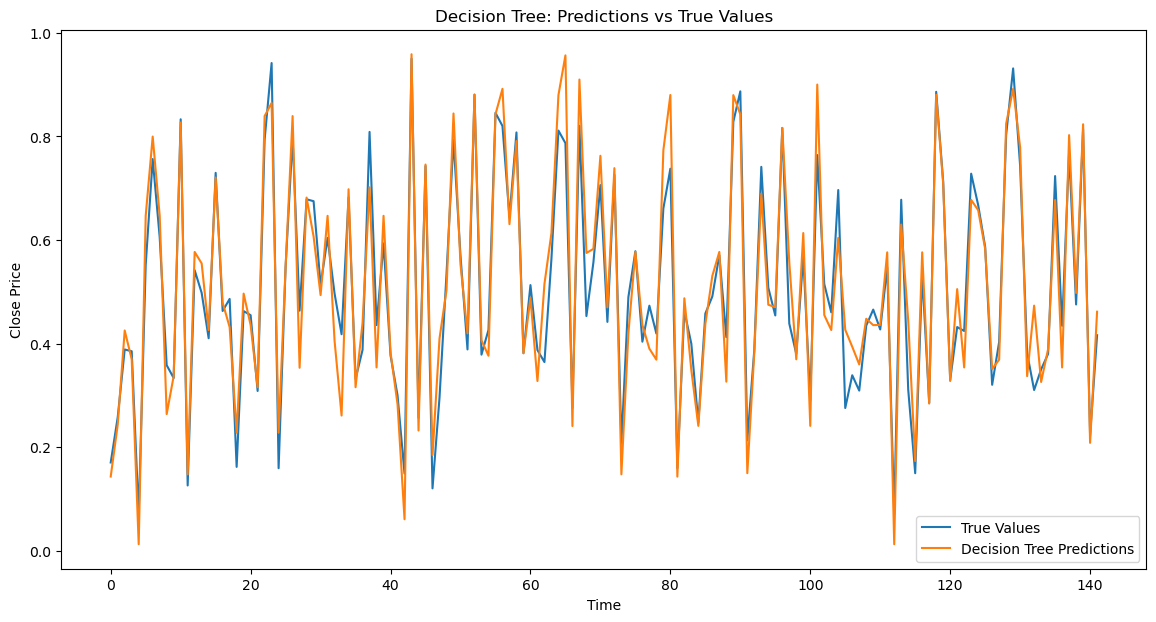

In [70]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [71]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.17902225986024983, True Value: 0.17023085262915405
Prediction: 0.231048315017421, True Value: 0.2576497906056945
Prediction: 0.39621869040937313, True Value: 0.3885276001725888
Prediction: 0.36478687153886624, True Value: 0.38513561891389525
Prediction: 0.05818124480268493, True Value: 0.06984923127337517
Prediction: 0.5930390264217347, True Value: 0.5516360698283145
Prediction: 0.7918658471278109, True Value: 0.7564080664205117
Prediction: 0.5662165799743584, True Value: 0.6056444348740402
Prediction: 0.2944056980136434, True Value: 0.35815744810595795
Prediction: 0.35119080021957105, True Value: 0.33337257437406276


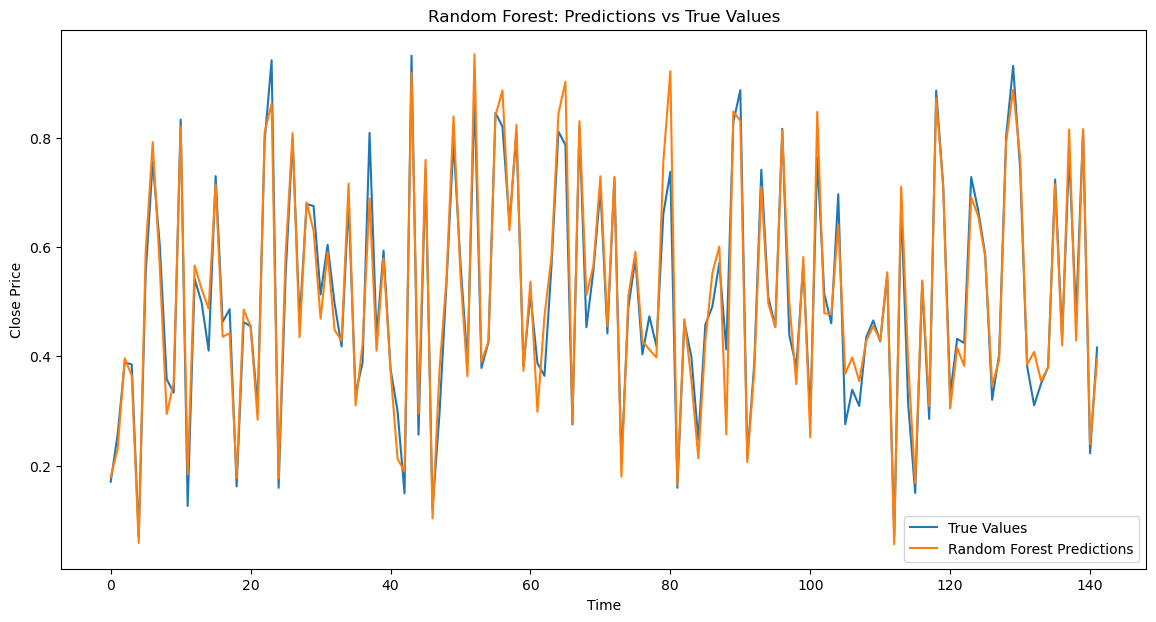

In [72]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

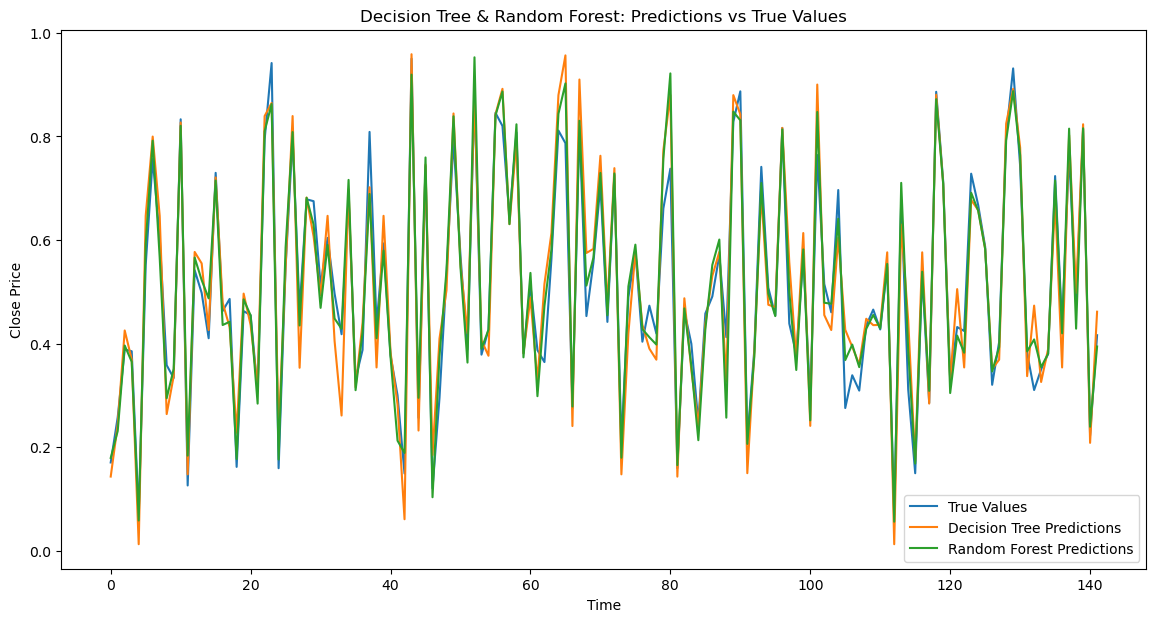

In [73]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()